### Importing necessary library

In [1]:
import pandas as pd
import numpy as np

import datetime

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

### Define global settings

In [2]:
pd.options.display.float_format = '{:.6f}'.format

### Reading the training and testing dataset files

In [3]:
X_train = pd.read_csv('../Data/X_Training_Can.csv')
X_test = pd.read_csv('../Data/X_Testing_Can.csv')

y_train = pd.read_csv('../Data/y_Training_Can.csv')
y_test = pd.read_csv('../Data/y_Testing_Can.csv')

### Features to keep

In [35]:
# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet' ,'lease_term_6 months',
#  'lease_term_Negotiable' ,'lease_term_Short Term', 'type_Basement',
#  'type_Condo Unit' ,'type_House','type_Room For Rent', 'type_Townhouse',
#  'smoking_Smoking Allowed' ,'province_British Columbia', 'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Nova Scotia',
#  'province_Ontario', 'province_Quebec', 'province_Saskatchewan']

# feat2keep = ['longitude', 'beds', 'baths', 'sq_feet', 'lease_term_6 months',
#  'lease_term_Short Term' ,'type_Basement' ,'type_House' ,'type_Room For Rent',
#  'province_British Columbia' ,'province_Manitoba',
#  'province_Newfoundland and Labrador' ,'province_Ontario', 'province_Quebec',
#  'province_Saskatchewan']

# feat2keep = ['longitude' ,'sq_feet', 'type_Basement' ,'type_Room For Rent',
#  'province_Manitoba']
# feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
# 'sq_feet','province_Manitoba','province_Saskatchewan',
# 'type_Basement','type_Room For Rent','latitude', 'lease_term_6 months',
#             'lease_term_Short Term', 'province_Northwest Territories',
#             'cats','dogs']


feat2keep = ['baths','beds','type_House','province_Ontario'	,'longitude',
'sq_feet','province_Saskatchewan',
'type_Basement','type_Room For Rent','latitude', ]

X_train = X_train[feat2keep]
X_test = X_test[feat2keep]

## Part 1: Find the optimal polynomial degree
---
Conclusion :


In [5]:
# List of RMSE 
train_rmse_errors = []
test_rmse_errors = []

# Define the starting point and ending point of
# the polynomial degrees to test 
degree_start = 1
degree_end = 3

# List to save degrees
degrees = list(range(degree_start, degree_end + 1))

# Create dataframe
x_test_pred_df = pd.DataFrame(columns=list(degrees))
y_test_pred_df = pd.DataFrame(columns=list(degrees))

# Loop over polynomial degrees
for degree in degrees:  
    
    # Create an instance of PolynomialFeatures
    converter = PolynomialFeatures(degree=degree, include_bias=False)
    
    # Fit converter to X features + transform features
    X_train_feat = converter.fit_transform(X_train)
    X_test_feat = converter.fit_transform(X_test)
    
    # Create training and testing dataset
    #X_train_feat, X_test_feat, y_train, y_test = train_test_split(X_fit_features, y, test_size=0.15, random_state=1)
    
    # Scale the features
    scaler = StandardScaler()
    X_train_feat_scaled = scaler.fit_transform(X_train_feat)
    X_test_feat_scaled = scaler.transform(X_test_feat)
    
    # Create the model
    model = LinearRegression()

    # Train the model
    model.fit(X_train_feat_scaled, y_train)
    
    # Get predictions for training dataset
    y_train_pred = model.predict(X_train_feat_scaled)

    # Get prediction for testing dataset
    y_test_pred = model.predict(X_test_feat_scaled)
    
    # Calculate RMSE for training dataset
    train_RMSE = np.sqrt(mean_squared_error(y_train, y_train_pred))
    
    # Calculate RMSE for testing dataset
    test_RMSE = np.sqrt(mean_squared_error(y_test, y_test_pred))
    
    # Store errors and degrees to lists
    train_rmse_errors.append(train_RMSE)
    test_rmse_errors.append(test_RMSE)

    # Store prediction from testing sample to dataframe
    #x_test_pred_df[degree]=  pd.Series(x_t_feat_scaled.flatten())
    #y_test_pred_df[degree] = pd.Series(y_test_pred.flatten())

In [6]:
# Create df with RMSE scores + degrees
results_df = pd.DataFrame({
    'Polynomial Degree': degrees,
    'RSME on training dataset': train_rmse_errors,
    'RMSE on testing dataset': test_rmse_errors
})

# Show results
results_df.set_index('Polynomial Degree')

,RSME on training dataset,RMSE on testing dataset
Polynomial Degree,,
1,731.827785,612.960659
2,661.957007,545.537504
3,624.128267,2982.401481


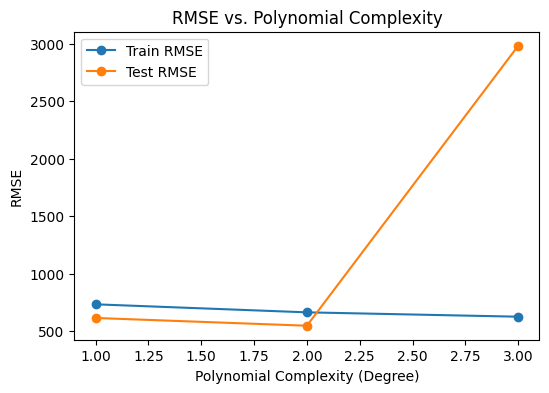

In [7]:
# Create figure
plt.figure(figsize=(6, 4))

# Add train RMSE line plot
plt.plot(degrees, train_rmse_errors, label='Train RMSE', marker='o')

# Add test RMSE line plot
plt.plot(degrees, test_rmse_errors, label='Test RMSE', marker='o')

# Add axis labels
plt.xlabel("Polynomial Complexity (Degree)")
plt.ylabel("RMSE")

# Add legend
plt.legend()

# Add title
plt.title("RMSE vs. Polynomial Complexity")

# Show plot
plt.show()

## Part 2 : Building the model with the best polynomial degree
---

### Create Polynomial Features

In [50]:
pol_degree = 2

In [51]:
# Create an instance of PolynomialFeatures
converter = PolynomialFeatures(degree=pol_degree, include_bias=False)

# Fit converter to X_train andX_testing features + transform features
X_train_feat = converter.fit_transform(X_train)
X_test_feat = converter.fit_transform(X_test)
    

### Data scaling

In [52]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit-transform training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform only on test data
X_test_scaled = scaler.transform(X_test)

### Create a Polynomial Regression Model

In [53]:
# Create the model
model = LinearRegression()

# Train the model
model.fit(X_train_feat_scaled, y_train)

LinearRegression()

### Use model on testing dataset

In [54]:
# Get prediction for testing dataset
y_pred = model.predict(X_test_feat_scaled)

### Compute RMSE

In [55]:
mae = mean_absolute_error(y_test, y_pred)

mse = mean_squared_error(y_test, y_pred)

rmse = np.sqrt(mse)

r2 = r2_score(y_test, y_pred)

print(f'The Mean Absolute Error = {mae:.0f}\n\
The Mean Square Error = {mse:.0f}\n\
The Root Mean Square Error = {rmse:.0f}\n\
The R2 scores = {r2:.0f}')

The Mean Absolute Error = 362
The Mean Square Error = 297611
The Root Mean Square Error = 546
The R2 scores = 1



| Regression Method   | Mean Absolute Error | Mean Square Error    | Root Mean Square Error | R2 scores   |
| ------------------- | ------------------- | -------------------- | ---------------------- | ----------- |
| Linear              | 391                | 375721             | 613                   | 1           |
| Polynomial          | 362                | 297611             | 546                   | 1           |

The errors (Mean Absolute, Mean Square and Root Mean Square) are all lower for the polynomial regression model than the linear regression model. A lower error is an indication that the prediction values are closer to the true value. 

** Conclusion ** </br>
The model built from a polynomial regression with an order of 2 performs better than the linear regression model, since its predicted values are closer to the true values.
